In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
print(os.listdir())

['.conda', '.condarc', '.config', '.continuum', '.dotnet', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.librarymanager', '.matplotlib', '.nuget', '.pylint.d', '.surprise_data', '.templateengine', '.thumbnails', '.vscode', '1yXAaTdR5bM186XUF6b4WBCE(1).pdf', '1yXAaTdR5bM186XUF6b4WBCE.pdf', '3D Objects', 'anaconda3', 'Anime Recomender system.ipynb', 'anime.csv', 'AppData', 'Application Data', 'A_Z_Handwritten_Data.csv', 'Breast Cancer prediction-Copy1.ipynb', 'Breast Cancer prediction.ipynb', 'Breast_cancer_data.csv', 'ChatBot.ipynb', 'Contacts', 'Cookies', 'Data Cleaning.ipynb', 'Desktop', 'Documents', 'Downloads', 'eng.my.exp0.box', 'Favorites', 'Gcat.csv', 'Handwritten digit classification.ipynb', 'Image cartoonify.ipynb', 'Image Classification.ipynb', 'Image processing.ipynb', 'IntelGraphicsProfiles', 'Iris Dataset ML Algorithms.ipynb', 'Links', 'Local Settings', 'Matplotlib.ipynb', 'Model1_cifar10_epoch10.h5', 'Multiprocessing.ipynb', 'Music', 'My Documents', 

In [4]:
df=pd.read_csv('Breast_cancer_data.csv')

In [5]:
#target=df.drop('diagnosis', axis=1, inplace=True)
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

array([[<AxesSubplot:title={'center':'mean_radius'}>,
        <AxesSubplot:title={'center':'mean_texture'}>],
       [<AxesSubplot:title={'center':'mean_perimeter'}>,
        <AxesSubplot:title={'center':'mean_area'}>],
       [<AxesSubplot:title={'center':'mean_smoothness'}>,
        <AxesSubplot:title={'center':'diagnosis'}>]], dtype=object)

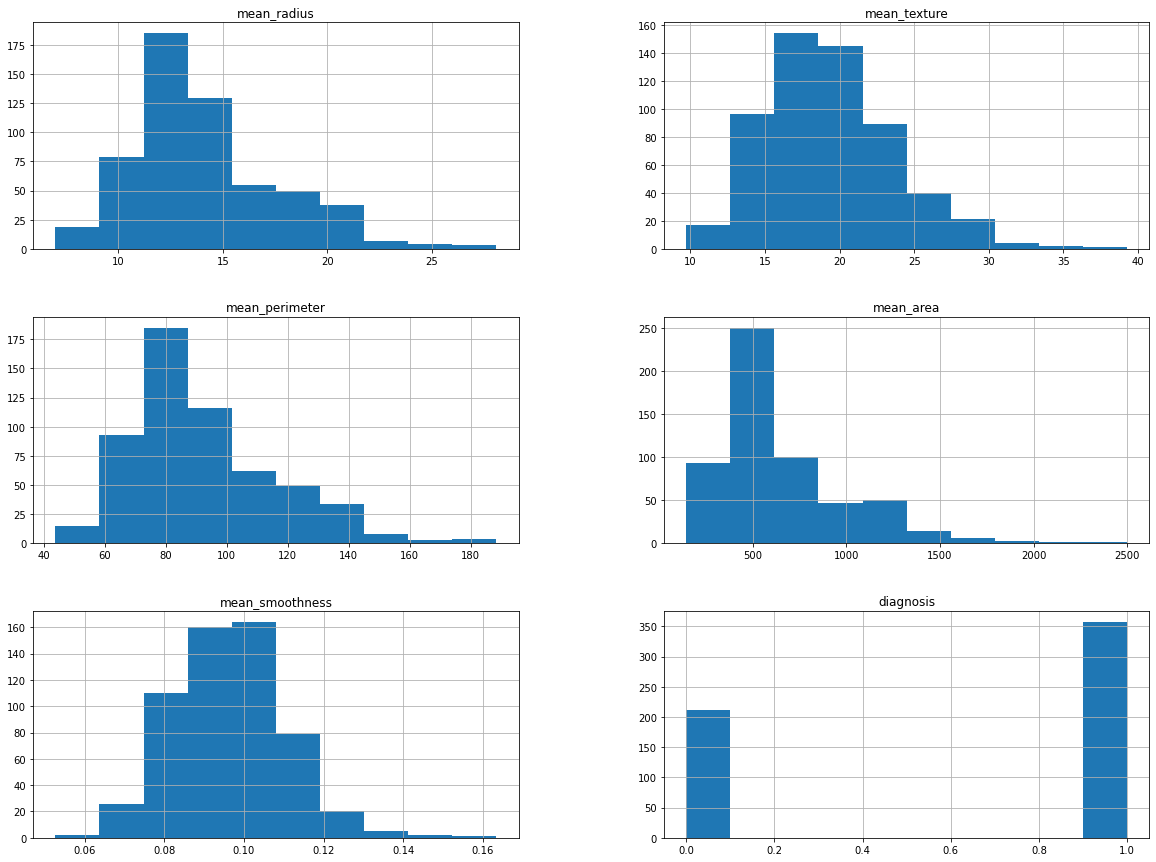

In [8]:
df.hist(figsize=(20,15))

In [9]:
array = df.values
x = array[:,0:5]
y = array[:,5]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, test_size = 0.25, random_state = 8)

In [10]:
print(x_train)

[[1.497e+01 1.976e+01 9.550e+01 6.902e+02 8.421e-02]
 [9.787e+00 1.994e+01 6.211e+01 2.945e+02 1.024e-01]
 [1.169e+01 2.444e+01 7.637e+01 4.064e+02 1.236e-01]
 ...
 [1.330e+01 2.157e+01 8.524e+01 5.461e+02 8.582e-02]
 [1.442e+01 1.654e+01 9.415e+01 6.412e+02 9.751e-02]
 [1.959e+01 2.500e+01 1.277e+02 1.191e+03 1.032e-01]]


In [11]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(C=2.0)))

# Evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 8, shuffle = True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: --mean: %f --std: %f --min: %f --max: %f' % (name, cv_results.mean(), cv_results.std(), cv_results.min(), cv_results.max())
    print(msg)

LR: --mean: 0.922148 --std: 0.064937 --min: 0.761905 --max: 0.976744
LDA: --mean: 0.919989 --std: 0.038792 --min: 0.833333 --max: 0.976744
KNN: --mean: 0.917553 --std: 0.049253 --min: 0.785714 --max: 0.976744
DTC: --mean: 0.898893 --std: 0.053059 --min: 0.809524 --max: 0.953488
GNB: --mean: 0.896567 --std: 0.059862 --min: 0.809524 --max: 0.976744
SVM: --mean: 0.931561 --std: 0.061650 --min: 0.761905 --max: 0.976744
